In [1]:
%%time

! pip install fastai --upgrade

     |████████████████████████████████| 189 kB 5.4 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
CPU times: user 50 ms, sys: 17.9 ms, total: 67.9 ms
Wall time: 5.76 s


In [2]:
%%time

import fastai
from fastai.collab import *
from fastai.tabular.all import *

CPU times: user 1.27 s, sys: 770 ms, total: 2.04 s
Wall time: 6.85 s


In [3]:
%%time
path = untar_data(URLs.ML_100k)

CPU times: user 133 ms, sys: 49.5 ms, total: 182 ms
Wall time: 461 ms


In [4]:
%%time
path.ls()

CPU times: user 215 µs, sys: 86 µs, total: 301 µs
Wall time: 309 µs


(#23) [Path('/root/.fastai/data/ml-100k/u2.base'),Path('/root/.fastai/data/ml-100k/u1.test'),Path('/root/.fastai/data/ml-100k/u.user'),Path('/root/.fastai/data/ml-100k/u2.test'),Path('/root/.fastai/data/ml-100k/u.info'),Path('/root/.fastai/data/ml-100k/u1.base'),Path('/root/.fastai/data/ml-100k/u.occupation'),Path('/root/.fastai/data/ml-100k/ub.base'),Path('/root/.fastai/data/ml-100k/u.genre'),Path('/root/.fastai/data/ml-100k/README')...]

In [5]:
%%time

ratings = pd.read_csv(path/"u.data", delimiter = '\t', header = None, names = ['user', 'movie', 'rating', 'timestamp'])

ratings.head()

CPU times: user 21.4 ms, sys: 13 ms, total: 34.5 ms
Wall time: 39.8 ms


In [7]:
%%time

ratings.head()

CPU times: user 149 µs, sys: 58 µs, total: 207 µs
Wall time: 215 µs


,user,movie,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [8]:
%%time

print (ratings["user"].nunique())
print (ratings["movie"].nunique())

943
1682
CPU times: user 4.33 ms, sys: 1.09 ms, total: 5.43 ms
Wall time: 8.02 ms


In [9]:
%%time

## dot product

last_skywalker = np.array([0.98, 0.9, -0.9])

user1 = np.array([0.9, 0.8, -0.6])

print ((user1*last_skywalker).sum())

2.1420000000000003
CPU times: user 1.05 ms, sys: 0 ns, total: 1.05 ms
Wall time: 1.06 ms


In [10]:
%%time

casablance = np.array([-0.99, -0.3, 0.8])

print ((user1*casablance).sum())

-1.611
CPU times: user 190 µs, sys: 0 ns, total: 190 µs
Wall time: 198 µs


In [11]:
%%time

## creating the dataloaders

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.72 µs


In [12]:
%%time
movies = pd.read_csv(path/'u.item', delimiter = '|', encoding = 'latin-1',
                     usecols = (0,1), names = ('movie', 'title'), header = None)

CPU times: user 7.61 ms, sys: 3.91 ms, total: 11.5 ms
Wall time: 12.8 ms


In [13]:
%%time
movies.head()

CPU times: user 211 µs, sys: 0 ns, total: 211 µs
Wall time: 238 µs


,movie,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [14]:
%%time
movies.tail()

CPU times: user 153 µs, sys: 57 µs, total: 210 µs
Wall time: 225 µs


,movie,title
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)
1681,1682,Scream of Stone (Schrei aus Stein) (1991)


In [15]:
%%time

ratings = ratings.merge(movies)

CPU times: user 22.3 ms, sys: 398 µs, total: 22.7 ms
Wall time: 33.5 ms


In [16]:
%%time
ratings.head()

CPU times: user 160 µs, sys: 58 µs, total: 218 µs
Wall time: 226 µs


,user,movie,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [17]:
%%time
dls = CollabDataLoaders.from_df(ratings, item_name = 'title', bs = 64)

CPU times: user 76.7 ms, sys: 9.78 ms, total: 86.5 ms
Wall time: 148 ms


In [18]:
%%time

dls.show_batch()

,user,title,rating
0,206,Hugo Pool (1997),1
1,521,Army of Darkness (1993),4
2,62,Stargate (1994),3
3,619,Titanic (1997),5
4,621,Cliffhanger (1993),2
5,354,Gone with the Wind (1939),3
6,387,Highlander (1986),3
7,870,Mars Attacks! (1996),3
8,269,"Life Less Ordinary, A (1997)",3
9,621,Kids in the Hall: Brain Candy (1996),3


CPU times: user 100 ms, sys: 7.63 ms, total: 108 ms
Wall time: 134 ms


In [19]:
%%time
# creating latent factors for users and movies

n_users = len(dls.classes['user'])
n_movies = len(dls.classes['title'])
n_factors = 5

CPU times: user 237 µs, sys: 0 ns, total: 237 µs
Wall time: 245 µs


In [20]:
user_factors = torch.randn(n_users, n_factors)
movie_factors = torch.randn(n_movies, n_factors)

In [21]:
n_users

944

In [22]:
user_factors[0]

tensor([ 1.9731,  0.3660,  1.1281, -0.4251, -0.8952])

In [24]:
one_hot_3 = one_hot(3, n_users).float()



In [25]:
user_factors.t().shape

torch.Size([5, 944])

In [26]:
user_factors.t() @ one_hot_3

tensor([-0.2111,  1.5129,  2.5235, -1.2151, -0.3497])

In [27]:
one_hot_3

tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

In [28]:
user_factors[3]

tensor([-0.2111,  1.5129,  2.5235, -1.2151, -0.3497])

In [30]:
class DotProduct(Module):
  def __init__(self, n_users, n_movies, n_factors):
    self.user_factors = Embedding(n_users, n_factors)
    self.movie_factors = Embedding(n_movies, n_factors)

  def forward(self, x):
    users = self.user_factors(x[:,0])
    movies = self.movie_factors(x[:, 1])

    return (users * movies).sum(dim = 1)

In [31]:
x,y = dls.one_batch()

In [32]:
print(x.shape, y.shape)

torch.Size([64, 2]) torch.Size([64, 1])


In [33]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func = MSELossFlat())

In [ ]:
%%time
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,1.355267,1.257992,00:10
1,1.061275,1.059534,00:10
2,0.954775,0.961088,00:10
3,0.796490,0.880683,00:10
4,0.769865,0.864913,00:10


CPU times: user 51.7 s, sys: 2.33 s, total: 54 s
Wall time: 1min 6s


In [34]:
## adding sigmoid range

class DotProduct(Module):
  def __init__(self, n_users, n_movies, n_factors, y_range = (0, 5.5)):
    self.user_factors = Embedding(n_users, n_factors)
    self.movie_factors = Embedding(n_movies, n_factors)
    self.y_range = y_range

  def forward(self, x):
    users = self.user_factors(x[:,0])
    movies = self.movie_factors(x[:, 1])

    return sigmoid_range((users * movies).sum(dim = 1), *self.y_range)

In [35]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func = MSELossFlat())
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,1.020576,0.980119,00:10
1,0.874225,0.889966,00:10
2,0.670055,0.856570,00:10
3,0.494190,0.859601,00:10
4,0.374151,0.864744,00:11


In [36]:
## adding bias

class DotProduct(Module):
  def __init__(self, n_users, n_movies, n_factors, y_range = (0, 5.5)):
    self.user_factors = Embedding(n_users, n_factors)
    self.movie_factors = Embedding(n_movies, n_factors)
    self.user_bias = Embedding(n_users, 1)
    self.movie_bias = Embedding(n_movies, 1)
    self.y_range = y_range

  def forward(self, x):
    users = self.user_factors(x[:, 0])
    movies = self.movie_factors(x[:, 1])
    res = (users * movies).sum(dim = 1, keepdim = True)
    res += self.user_bias(x[:, 0]) + self.movie_bias(x[:, 1])

    return sigmoid_range(res, *self.y_range)

In [ ]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func = MSELossFlat())
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.919432,0.942467,00:11
1,0.816366,0.855337,00:11
2,0.608825,0.856065,00:11
3,0.416659,0.881365,00:11
4,0.293751,0.888612,00:11


In [ ]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func = MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd = 0.1)

epoch,train_loss,valid_loss,time
0,0.936069,0.939349,00:11
1,0.873949,0.872618,00:11
2,0.735056,0.829662,00:11
3,0.612815,0.814089,00:11
4,0.501582,0.814522,00:11


In [ ]:
## creating our own embedding module

In [ ]:
class T(Module):
  def __init__(self): self.a = torch.ones(3)

In [ ]:
L(T().parameters())

(#0) []

In [ ]:
class T(Module):
  def __init__(self): self.a = nn.Parameter(torch.ones(4))

In [ ]:
L(T().parameters())

(#1) [Parameter containing:
tensor([1., 1., 1., 1.], requires_grad=True)]

In [ ]:
class T(Module):
  def __init__(self) : self.a = nn.Linear(1,3,bias = True)

In [ ]:
t = T()

In [ ]:
L(t.parameters())

(#2) [Parameter containing:
tensor([[-0.9827],
        [ 0.9697],
        [-0.2721]], requires_grad=True),Parameter containing:
tensor([-0.1251,  0.8750,  0.3374], requires_grad=True)]

In [ ]:
type(t.a.weight)

torch.nn.parameter.Parameter

In [ ]:
def create_params(size):
  return nn.Parameter(torch.zeros(*size).normal_(0, 0.01))

In [ ]:
t = create_params([5,4])

In [ ]:
t

Parameter containing:
tensor([[-0.0057, -0.0020,  0.0122,  0.0042],
        [-0.0007,  0.0039, -0.0179,  0.0125],
        [ 0.0130, -0.0018, -0.0052, -0.0062],
        [-0.0033,  0.0103,  0.0067, -0.0008],
        [ 0.0021, -0.0174, -0.0039, -0.0128]], requires_grad=True)

In [ ]:
del t

In [37]:
class DotProduct(Module):
  def __init__(self, n_users, n_movies, n_factors, y_range = (0, 5.5)):
    self.user_factors = create_params([n_users, n_factors])
    self.movie_factors = create_params([n_movies, n_factors])
    self.y_range = y_range
    self.user_bias = create_params([n_users])
    self.movie_bias = create_params([n_movies])

  def forward(self, x):
    users = self.user_factors[x[:, 0]]
    movies = self.movie_factors[x[:, 1]]
    res = (users * movies).sum(dim = 1)
    res += self.user_bias[x[:, 0]] + self.movie_bias[x[:, 1]]

    return sigmoid_range(res, *self.y_range)

In [ ]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func = MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd = 0.1)

epoch,train_loss,valid_loss,time
0,0.954393,0.938841,00:12
1,0.837381,0.868778,00:12
2,0.713720,0.831216,00:12
3,0.569827,0.816192,00:12
4,0.497229,0.818228,00:12


In [ ]:
movie_bias = learn.model.movie_bias.squeeze()

In [ ]:
idxs = movie_bias.argsort()[:5]

In [ ]:
[dls.classes['title'][i] for i in idxs]

['Children of the Corn: The Gathering (1996)',
 'Lawnmower Man 2: Beyond Cyberspace (1996)',
 'Showgirls (1995)',
 'Cable Guy, The (1996)',
 'Robocop 3 (1993)']

In [ ]:
idxs = movie_bias.argsort(descending = True)[:5]

In [ ]:
[dls.classes['title'][i] for i in idxs]

['Shawshank Redemption, The (1994)',
 'Titanic (1997)',
 'L.A. Confidential (1997)',
 'Star Wars (1977)',
 "Schindler's List (1993)"]

In [ ]:
## now doing the same using fastai collab

In [ ]:
learn = collab_learner(dls, n_factors = 50, y_range = (0, 5.5))

In [ ]:
%%time
learn.fit_one_cycle(5, 5e-3, wd = 0.1)

epoch,train_loss,valid_loss,time
0,0.927769,0.950874,00:11
1,0.831730,0.867153,00:11
2,0.735776,0.825967,00:11
3,0.582633,0.812595,00:11
4,0.481854,0.814240,00:11


CPU times: user 56.4 s, sys: 1.3 s, total: 57.7 s
Wall time: 57.5 s


In [ ]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 50)
  (i_weight): Embedding(1665, 50)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1665, 1)
)

In [ ]:
movie_bias = learn.model.i_bias.weight.squeeze()

In [ ]:
idxs = movie_bias.argsort()[:5]

In [ ]:
[dls.classes['title'][i] for i in idxs]

['Children of the Corn: The Gathering (1996)',
 'Showgirls (1995)',
 'Cable Guy, The (1996)',
 'Lawnmower Man 2: Beyond Cyberspace (1996)',
 'Mr. Magoo (1997)']

In [ ]:
idxs = movie_bias.argsort(descending = True)[:5]

In [ ]:
[dls.classes['title'][i] for i in idxs]

['Shawshank Redemption, The (1994)',
 "Schindler's List (1993)",
 'Titanic (1997)',
 'L.A. Confidential (1997)',
 'Star Wars (1977)']

In [ ]:
## embedding distance

In [ ]:
movie_factors = learn.model.i_bias.weight

In [ ]:
idx = dls.classes['title'].o2i['Silence of the Lambs, The (1991)']

In [ ]:
idx

1330

In [ ]:
distances = nn.CosineSimilarity(dim = 1)(movie_factors, movie_factors[idx][None])

In [ ]:
idx = distances.argsort(descending = True)[1]

In [ ]:
dls.classes['title'][idx]

'Two Friends (1986) '

In [38]:
## deep learning for collaborative filtering

In [39]:
embs = get_emb_sz(dls)

In [40]:
embs

[(944, 74), (1665, 102)]

In [42]:
ratings["user"].nunique()

943

In [43]:
ratings["title"].nunique()

1664

In [44]:
class CollabNN(Module):
  def __init__(self, user_sz, item_sz, y_range = (0, 5.5), n_act = 100):
    self.user_factors = Embedding(*user_sz)
    self.item_factors = Embedding(*item_sz)
    self.layers = nn.Sequential(
         nn.Linear(user_sz[1] + item_sz[1], n_act),
         nn.ReLU(),
         nn.Linear(n_act, 1))
    self.y_range = y_range

  def forward(self, x):
    embs = self.user_factors(x[:, 0]), self.item_factors(x[:, 1])
    x = self.layers(torch.cat(embs, dim = 1))
    return sigmoid_range(x, *self.y_range)

In [45]:
model = CollabNN(*embs)

In [46]:
%%time
learn = Learner(dls, model, loss_func = MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd = 0.01)

epoch,train_loss,valid_loss,time
0,0.925193,0.948710,00:25
1,0.920235,0.899243,00:12
2,0.873597,0.866688,00:12
3,0.839378,0.855860,00:12
4,0.760159,0.858017,00:12


CPU times: user 1min 11s, sys: 1.15 s, total: 1min 12s
Wall time: 1min 15s


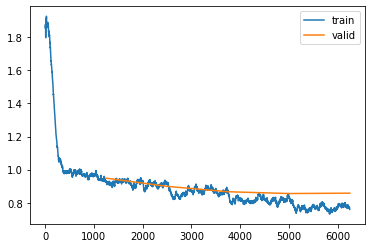

In [47]:
learn.recorder.plot_loss()

In [48]:
learn = collab_learner(dls, use_nn = True, y_range = (0, 5.5), layers = [100, 50])
learn.fit_one_cycle(5, 5e-3, wd = 0.1)

epoch,train_loss,valid_loss,time
0,0.982984,0.971487,00:28
1,0.942984,0.910435,00:17
2,0.904620,0.877718,00:14
3,0.814015,0.848516,00:14
4,0.784218,0.847156,00:14
